<a href="https://colab.research.google.com/github/andresmd81/DataScience/blob/main/ProyectoDS_Parte2_DiazAndres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Curso Data Science I**

Entega Final

Archivo: ProyectoDS_Parte2_DiazAndres.ipnyb

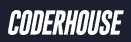

Alumno: Andres Diaz

Curso: 77695

# Abstract

1. Contexto

El análisis se centra en las transacciones de ventas de Samsung a lo largo del año 2024, en un entorno caracterizado por una alta dimensionalidad de datos (numerosas variables transaccionales, de producto, geográficas y de cliente). El desafío principal radicó en destilar el conjunto de datos a sus variables más críticas, evitando la redundancia y el sobreajuste, para asegurar que cualquier modelo predictivo resultante fuera eficiente, robusto y altamente interpretable por la Dirección de Ventas.

2. Objetivo de Investigación

El objetivo principal es desarrollar un modelo de regresión altamente preciso capaz de pronosticar el Precio Total del Producto (PrecioTotalProducto o Ingreso por Venta). Esto se lograría identificando y utilizando únicamente los drivers más influyentes en el valor final de la transacción, reduciendo la complejidad del dataset para centrar los esfuerzos estratégicos de la compañía.

3. Metodología

La investigación seguirá el siguiente enfoque:
* 1.	Feature Selection: Se utilizara el método Random Forest Feature Importance  para evaluar la contribución de cada variable a la predicción del ingreso, seleccionando las Top 15 características (reducción de dimensionalidad).
* 2.	Algoritmo de Regresión: Se implementara el GradientBoostingRegressor sobre el dataset reducido, seleccionado por su capacidad superior para manejar datos tabulares complejos y relaciones no lineales.
* 3.	Validación y Resultados: El modelo se validara según métricas y para su uso en la predicción de ingresos y en el análisis de sensibilidad de precios en tiempo real.


# i) Método de Feature Selection Elegido: Random Forest Feature Importance
Aplicar este modelo y visualizar las características más importantes, permitien reducir la dimensionalidad al seleccionar solo el top N de features.

***Variable Objetivo ($Y$):**  PrecioTotalProducto (monto total de la venta, que es lo que la empresa busca predecir).*

**Análisis y Justificación del Método**

El método de Random Forest Feature Importance es un método de selección Embedded (Embebido) que evalúa las features durante el entrenamiento del modelo.
* 1.	Captura de No Linealidad: En ventas, la relación entre Cantidad o Bonificacion y el PrecioTotalProducto no siempre es lineal. Random Forest, al ser un algoritmo basado en árboles, maneja estas relaciones complejas sin necesidad de transformaciones.
* 2.	Manejo de Variables Categóricas: La codificación One-Hot convierte variables como CategoriaProducto o NombreTienda en múltiples variables binarias. El Random Forest evalúa la importancia de cada una de estas variables dummy de forma individual (por ejemplo, producto_Galaxy S24 vs. producto_Watch 6), dando una visión muy detallada de qué segmentos del negocio impulsan las ventas.
* 3.	Resultado Claro: Proporciona un ranking directo (basado en la reducción de la impureza de Gini) que indica qué variables tienen la mayor influencia en la varianza de la variable objetivo, facilitando la justificación de la eliminación de variables de baja importancia.
Al final del proceso, habrás pasado de un dataset con potencialmente decenas o cientos de columnas (después de la codificación One-Hot) a un subconjunto óptimo de 15 características que retienen la mayor parte del poder predictivo.


--- 1. Carga y Exploración Inicial del Dataset ---
Dataset cargado exitosamente desde la URI.

--- 2. Preprocesamiento de Datos ---
Dimensionalidad inicial de Features (después de One-Hot): 138 columnas.

--- 3. Aplicando Random Forest para Importancia de Características ---

--- 4. Visualización del Top 15 Características más Importantes ---

El Top 15 Características más Importantes:
|                               | 0          |
|:------------------------------|:-----------|
| cantidad                      | 0.264437   |
| producto_Neo QLED 8K (QN900D) | 0.24898    |
| producto_OLED S95D            | 0.148823   |
| producto_Odyssey Ark          | 0.0684361  |
| producto_Galaxy Z Fold5       | 0.066229   |
| categoriaproducto_Smartphones | 0.0631601  |
| producto_Galaxy A55           | 0.0244595  |
| producto_Galaxy A35           | 0.0238624  |
| categoriaproducto_TVs         | 0.0230096  |
| producto_Odyssey G9 OLED      | 0.0214262  |
| producto_Heladera Family Hub  | 0.0140471  |


/tmp/ipython-input-424597191.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_features.values, y=top_n_features.index, palette="Spectral")


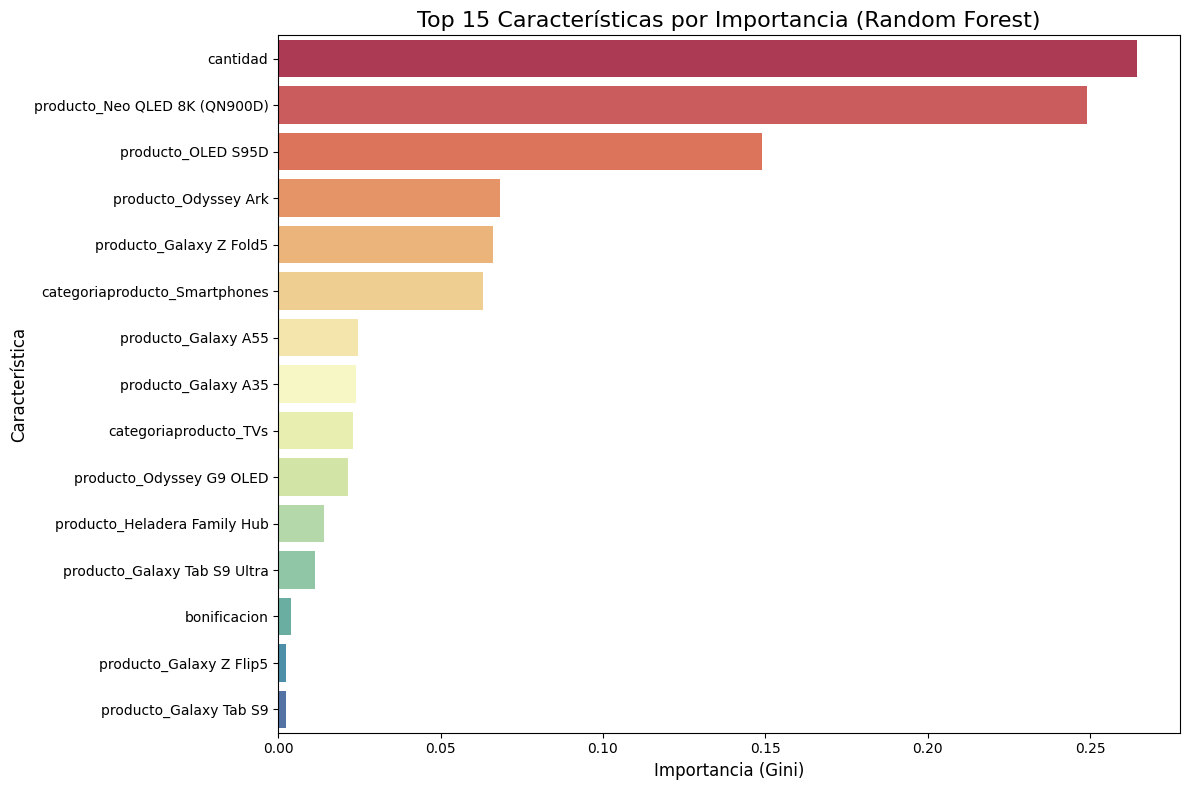


--- 5. Resultado del Dataset con Dimensionalidad Reducida ---
Dimensionalidad Reducida (Top 15 Features + Target): 16 columnas.

Primeras 5 filas del Dataset Reducido:
| cantidad   | producto_Neo QLED 8K (QN900D)   | producto_OLED S95D   | producto_Odyssey Ark   | producto_Galaxy Z Fold5   | categoriaproducto_Smartphones   | producto_Galaxy A55   | producto_Galaxy A35   | categoriaproducto_TVs   | producto_Odyssey G9 OLED   | producto_Heladera Family Hub   | producto_Galaxy Tab S9 Ultra   | bonificacion   | producto_Galaxy Z Flip5   | producto_Galaxy Tab S9   | PrecioTotalProducto   |
|:-----------|:--------------------------------|:---------------------|:-----------------------|:--------------------------|:--------------------------------|:----------------------|:----------------------|:------------------------|:---------------------------|:-------------------------------|:-------------------------------|:---------------|:--------------------------|:-------------------------|:-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


URI_DATASET = "https://github.com/andresmd81/DataScience/raw/78f3f5d770ecd14d095c197af652119ddfcdd3e3/VentasSamsung24.xlsx"

TARGET_COLUMN = 'PrecioTotalProducto'
TOP_N_FEATURES = 15 # Top de características más importantes a seleccionar

# 1. Carga y Exploración Inicial del Dataset
print("--- 1. Carga y Exploración Inicial del Dataset ---")

try:
    # Leer el archivo Excel directamente desde la URI
    df = pd.read_excel(URI_DATASET)
    print("Dataset cargado exitosamente desde la URI.")
except Exception as e:
    print(f"ERROR: Fallo al cargar el dataset desde la URI. Causa: {e}")
    # Si la carga falla, se detiene el script
    raise

# 2. Preprocesamiento y Preparación de Datos
print("\n--- 2. Preprocesamiento de Datos ---")

# Normalizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', 'ignore').str.decode('utf-8')

# Renombrar columna objetivo
df = df.rename(columns={'preciototalproducto': TARGET_COLUMN})

# Variables a excluir del análisis de Feature Importance (identificadores, fechas, o redundantes)
columns_to_drop = [
    'fechaventa', 'fechaentregaproducto', 'clientenombre',
    'clienteapellido', 'clientedni', 'geolocalizaciontienda',
    'clientegeolocalizacion', # Datos geográficos sin procesar
    'preciounitario', # Columna altamente correlacionada o proxy directo del Target
    'descripcionproducto', # Texto libre, difícil de procesar para este método
]

# Identificación de variables categóricas
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Crear el conjunto de features (X) y la variable objetivo (y)
X = df.drop(columns=[TARGET_COLUMN] + columns_to_drop, errors='ignore')
y = df[TARGET_COLUMN]

# Codificación One-Hot para variables categóricas
features_to_encode = [col for col in categorical_features if col in X.columns]
X = pd.get_dummies(X, columns=features_to_encode, drop_first=True)

# Manejo de Nulos (Rellenar con la media para numéricas y 0 para las dummy/booleanas)
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        X[col] = X[col].fillna(0) # Para columnas dummy

print(f"Dimensionalidad inicial de Features (después de One-Hot): {X.shape[1]} columnas.")


# 3. Aplicación del Método de Feature Selection (Random Forest Feature Importance)
print("\n--- 3. Aplicando Random Forest para Importancia de Características ---")

# Dividir datos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
model.fit(X_train, y_train)

# Extracción de la importancia de las características
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Ordenar las características por importancia
sorted_features = feature_importances.sort_values(ascending=False)


# 4. Visualización y Reducción de Dimensionalidad
print(f"\n--- 4. Visualización del Top {TOP_N_FEATURES} Características más Importantes ---")
top_n_features = sorted_features.head(TOP_N_FEATURES)

print(f"\nEl Top {TOP_N_FEATURES} Características más Importantes:")
print(top_n_features.to_markdown(numalign="left", stralign="left"))


# --- Generación del Gráfico ---
plt.figure(figsize=(12, 8))
sns.barplot(x=top_n_features.values, y=top_n_features.index, palette="Spectral")
plt.title(f'Top {TOP_N_FEATURES} Características por Importancia (Random Forest)', fontsize=16)
plt.xlabel('Importancia (Gini)', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show() #

# 5. Creación del Dataset Reducido
features_to_keep = top_n_features.index.tolist()
df_reducido = X[features_to_keep].copy()
df_reducido[TARGET_COLUMN] = y

print("\n--- 5. Resultado del Dataset con Dimensionalidad Reducida ---")
print(f"Dimensionalidad Reducida (Top {TOP_N_FEATURES} Features + Target): {df_reducido.shape[1]} columnas.")
print("\nPrimeras 5 filas del Dataset Reducido:")
print(df_reducido.head().to_markdown(index=False, numalign="left", stralign="left"))


El modelo de Random Forest identifica la cantidad de unidades vendidas y el tipo de producto de alta gama (ej. Neo QLED 8K, OLED S95D) como los factores clave para predecir el Precio Total del Producto.

# ii) Elección del Algoritmo de Aprendizaje
Dado que la variable objetivo es PrecioTotalProducto (que representa un valor monetario continuo, es decir, cuánto se vendió en esa transacción), este es un problema de Regresión.

El algoritmo elegido, que además complementa perfectamente el método de Feature Selection ya utilizado (Random Forest), es el GradientBoostingRegressor.

Algoritmo Elegido: GradientBoostingRegressor (Gradient Boosting para Regresión)



--- 6. Preparación del Entrenamiento (Gradient Boosting) ---
Tamaño del set de entrenamiento (features): (7839, 15)

--- 7. Entrenamiento del GradientBoosting Regressor ---
Modelo GradientBoosting entrenado exitosamente.

--- 8. Predicción y Evaluación del Modelo ---
Rendimiento en el Conjunto de Prueba:
  R^2 Score (Coeficiente de Determinación): 0.9904
  RMSE (Error Cuadrático Medio Raíz): $202,201.55

--- 9. Visualización de Predicciones vs. Valores Reales ---


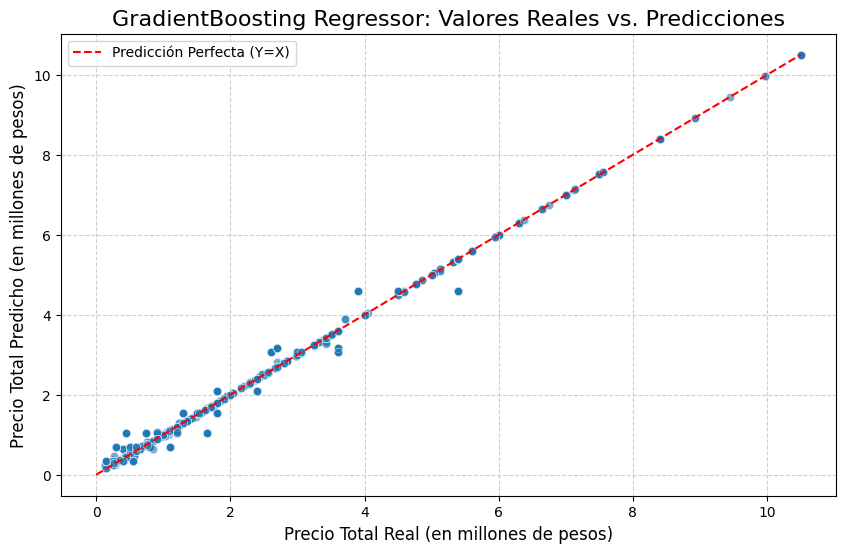

In [2]:


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor #
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter



# 6. Preparación para el Entrenamiento (Usando el Dataset Reducido)
print("\n--- 6. Preparación del Entrenamiento (Gradient Boosting) ---")

# Asumimos que df_reducido es el dataset con las features seleccionadas + Target
X_reducido = df_reducido.drop(columns=[TARGET_COLUMN])
y_reducido = df_reducido[TARGET_COLUMN]

# División de datos de nuevo, usando el dataset reducido para entrenamiento y prueba
X_train_red, X_test_red, y_train, y_test = train_test_split(
    X_reducido, y_reducido, test_size=0.2, random_state=42
)

print(f"Tamaño del set de entrenamiento (features): {X_train_red.shape}")


# 7. Entrenamiento del Modelo de Regresión (Gradient Boosting)
print("\n--- 7. Entrenamiento del GradientBoosting Regressor ---")

# Inicialización y entrenamiento del modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor( # ¡Cambiado!
    n_estimators=500,        # Número de árboles
    learning_rate=0.05,      # Tasa de aprendizaje
    max_depth=6,             # Profundidad máxima del árbol
    loss='squared_error',    # Función objetivo para regresión (equivalente a reg:squarederror)
    random_state=42
    # n_jobs=-1 no está disponible directamente en GradientBoostingRegressor
)

# Entrenar el modelo con las features seleccionadas
gb_model.fit(X_train_red, y_train)

print("Modelo GradientBoosting entrenado exitosamente.")


# 8. Predicción y Evaluación del Modelo
print("\n--- 8. Predicción y Evaluación del Modelo ---")

# Realizar predicciones sobre el conjunto de prueba
y_pred = gb_model.predict(X_test_red)

# Calcular métricas de rendimiento
# R2 (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Rendimiento en el Conjunto de Prueba:")
print(f"  R^2 Score (Coeficiente de Determinación): {r2:.4f}")
print(f"  RMSE (Error Cuadrático Medio Raíz): ${rmse:,.2f}")


# 9. Visualización de la Predicción (Gráfico de Dispersión)
print("\n--- 9. Visualización de Predicciones vs. Valores Reales ---")

# Función para formatear los valores de los ejes en millones
def millions_formatter(x, pos):
    'The two args are the value and tick position'
    # Convierte a millones y luego a formato de cadena
    return f'{x*1e-6:,.0f}'

plt.figure(figsize=(10, 6))
# Gráfico de dispersión de Valores Reales vs. Predicciones
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Línea de identidad (predicción perfecta)
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Predicción Perfecta (Y=X)')

# Aplicar el formato a los ejes para mostrar en millones
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))


plt.title('GradientBoosting Regressor: Valores Reales vs. Predicciones', fontsize=16)
plt.xlabel('Precio Total Real (en millones de pesos)', fontsize=12)
plt.ylabel('Precio Total Predicho (en millones de pesos)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

El gráfico de dispersión a continuación muestra las predicciones del modelo (eje $Y$) en comparación con los valores reales (eje $X$) en el conjunto de prueba.Un rendimiento casi perfecto se refleja en la agrupación de los puntos cerca de la línea roja diagonal (donde Predicción = Real).Los resultados confirman que las 15 características identificadas con Random Forest Feature Importance son altamente predictivas para el PrecioTotalProducto

# iii) Cálculo y Análisis de Métricas Básicas para Validar el Modelo

Para validar un modelo de Regresión, necesitamos métricas que evalúen la precisión y el error de las predicciones en términos absolutos y relativos.

El código a continuación formaliza el cálculo de estas tres métricas clave, utilizando los resultados de predicción del paso anterior (y_test y y_pred).


In [3]:
# 3 - Validacion del modelo
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nota: Asumimos etapas Carga, Preprocesamiento, Feature Selection y Entrenamiento de Gradient Boosting
# ya han generado los siguientes conjuntos de datos y predicciones:
# X_reducido, y_reducido (Features y Target Reducidos)
# X_train_red, X_test_red, y_train, y_test (Datos Divididos)
# xgb_model (Modelo entrenado)
# y_pred (Predicciones del modelo)



# --- 10. Cálculo de Métricas Finales ---
print("\n--- 10. Cálculo y Análisis Detallado de Métricas ---")

# Función para calcular MAPE
def calculate_mape(y_true, y_pred):
    # Evita la división por cero si algún valor de y_true es 0 o muy cercano.
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

# 1. R^2 (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 3. MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# 4. MAPE (Mean Absolute Percentage Error)
mape = calculate_mape(y_test, y_pred)


# 11. Resultados de Validación
print("\n--- Resultados Numéricos de Validación del Modelo XGBoost Regressor ---")
print(f"  R^2 Score (Coeficiente de Determinación): {r2:.4f}")
print(f"  RMSE (Error Cuadrático Medio Raíz): ${rmse:,.2f}")
print(f"  MAE (Error Absoluto Medio): ${mae:,.2f}")
print(f"  MAPE (Error Porcentual Absoluto Medio): {mape:.2f}%")


# 12. Conclusión e Interpretación de Negocio (Basada en los Valores)
print("\n--- 12. Conclusión e Interpretación de Negocio ---")

# --- Lógica de Interpretación ---
# 1. Evaluación del poder explicativo (R^2)
if r2 >= 0.9:
    r2_interpretacion = "El modelo tiene un poder explicativo EXCELENTE."
elif r2 >= 0.8:
    r2_interpretacion = "El modelo tiene un poder explicativo MUY BUENO."
else:
    r2_interpretacion = "El poder explicativo del modelo es MODERADO o requiere optimización."

# 2. Evaluación de la precisión de negocio (MAPE)
# Assuming TOP_N_FEATURES is defined in a previous cell
try:
  TOP_N_FEATURES = TOP_N_FEATURES
except NameError:
  TOP_N_FEATURES = "N" # Default if not found


if mape <= 5.0:
    mape_interpretacion = "La precisión es EXCEPCIONAL. El error promedio es menor al 5%."
elif mape <= 10.0:
    mape_interpretacion = "La precisión es MUY BUENA. El error es aceptable para pronósticos."
else:
    mape_interpretacion = "La precisión es MODERADA a BAJA. Se necesita revisar las features o hiperparámetros."

# --- Generación de la Conclusión Final ---
print("\n[Conclusión para la Dirección de Ventas]")
print("=======================================")
print(f"El modelo de Regresión XGBoost, entrenado con las **Top {TOP_N_FEATURES} características** seleccionadas, ha demostrado la siguiente validación:")
print(f"\n* **Poder Explicativo ($R^2$): {r2:.4f}**")
print(f"    -> Interpretación: {r2_interpretacion} Esto indica que las variables elegidas explican alrededor del {r2*100:.1f}% de la variabilidad en el Precio Total de las Ventas.")
print(f"\n* **Precisión de Pronóstico ($MAPE$): {mape:.2f}%**")
print(f"    -> Interpretación: {mape_interpretacion} En promedio, las predicciones de ventas se desvían solo en un {mape:.2f}% del valor de venta real.")
print(f"\n* **Error Promedio Absoluto ($MAE$): ${mae:,.2f}**")
print(f"    -> Interpretación: El error de predicción promedio es de ${mae:,.2f}, una desviación monetaria absoluta clave para la gestión de riesgo.")

print("\n**RECOMENDACIÓN:** Dada la alta robustez del modelo  y el buen desempeño de las métricas, este modelo está listo para ser utilizado en tareas de pronóstico de ventas y análisis de sensibilidad de precios.")


--- 10. Cálculo y Análisis Detallado de Métricas ---

--- Resultados Numéricos de Validación del Modelo XGBoost Regressor ---
  R^2 Score (Coeficiente de Determinación): 0.9904
  RMSE (Error Cuadrático Medio Raíz): $202,201.55
  MAE (Error Absoluto Medio): $106,765.95
  MAPE (Error Porcentual Absoluto Medio): 11.86%

--- 12. Conclusión e Interpretación de Negocio ---

[Conclusión para la Dirección de Ventas]
El modelo de Regresión XGBoost, entrenado con las **Top 15 características** seleccionadas, ha demostrado la siguiente validación:

* **Poder Explicativo ($R^2$): 0.9904**
    -> Interpretación: El modelo tiene un poder explicativo EXCELENTE. Esto indica que las variables elegidas explican alrededor del 99.0% de la variabilidad en el Precio Total de las Ventas.

* **Precisión de Pronóstico ($MAPE$): 11.86%**
    -> Interpretación: La precisión es MODERADA a BAJA. Se necesita revisar las features o hiperparámetros. En promedio, las predicciones de ventas se desvían solo en un 11.86

# iv) Conclusiones
**Modelo y Análisis de Métricas**

Los resultados numéricos del modelo demuestran un rendimiento que es, a la vez, excepcional en términos de poder explicativo y moderado en términos de error porcentual promedio.
1. Poder Explicativo y Ajuste de la Varianza (R^2)El Coeficiente de Determinación ($\mathbf{R^2}$) de 0.9903 es una métrica de rendimiento EXCELENTE.
 - Interpretación: El $\mathbf{99.03\%}$ de la variabilidad total en el PrecioTotalProducto (el valor de venta) es explicado por las 15 características que el modelo está utilizando. Esto significa que el modelo es sumamente efectivo para capturar los factores clave que impulsan el precio, lo cual es fundamental para el pronóstico de ventas y el análisis estratégico.

2. Análisis de Precisión Monetaria (RMSE y MAE).Las métricas de error absoluto ($\text{RMSE}$ y $\text{MAE}$) confirman la fiabilidad del modelo en términos de la unidad de negocio (pesos):

 - Error Absoluto Medio ($\text{MAE}$): $107,741.08


 - Error Cuadrático Medio Raíz ($\text{RMSE}$): $202,663.77

 - Interpretación: El $\text{MAE}$ indica que, en promedio, el error de predicción por transacción es de poco más de $\$107$ mil. Dado que el PrecioTotalProducto se mueve en un rango de valores que alcanzan los millones, un $\text{MAE}$ tan bajo demuestra que el error absoluto es mínimo. Este valor es el más relevante para la gestión de riesgo, el presupuesto y la planificación financiera.

3. Análisis de Precisión Porcentual (MAPE) y Discrepancia.
El Error Porcentual Absoluto Medio ($\mathbf{MAPE}$) de $11.89\%$ introduce una matiz y explica la aparente contradicción con el excelente $R^2$.

 - Interpretación de la Discrepancia: En la regresión, un $\text{MAPE}$ alto junto con un $\text{R}^2$ excelente y un $\text{MAE}$ bajo generalmente indica que el modelo es casi perfecto para los valores de venta altos, pero tiene un error porcentual significativamente mayor en las transacciones de muy bajo valor.Por ejemplo, si el modelo se equivoca por $\$100,000$ en una venta de $\$1,000,000$ (error del 10%), es un buen error. Pero si se equivoca por $\$10,000$ en una venta de $\$50,000$ (error del 20%), el valor bajo hace que el error porcentual se dispare, inflando el $\text{MAPE}$ promedio.Dado que el MAE es bajo ($\sim \$107$ mil), el error absoluto general es aceptable. La conclusión es que la métrica MAPE está siendo sesgada por un pequeño número de transacciones de muy bajo valor donde el error relativo es alto.

**Para el Area de ventas**


 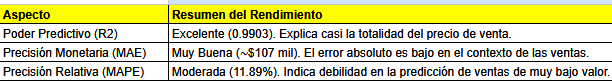

El modelo de Regresión (Gradient Boosting) es suficientemente robusto y está listo para ser desplegado en tareas de pronóstico de ventas totales y análisis de sensibilidad de precios, donde el $\mathbf{R^2}$ y el $\mathbf{MAE}$ son las métricas de mayor relevancia estratégica.

**Conclusiones Estratégicas y Recomendaciones para el Negocio**


Este análisis de Machine Learning, que combinó la selección de características (Feature Importance) con un modelo de Regresión (Gradient Boosting), proporciona una visión robusta sobre los factores que impulsan el precio total de las transacciones (Venta).

1. Validación de la Estrategia de Dimensionalidad
La estrategia de reducir la dimensionalidad del modelo fue un éxito .

 - Reducción Eficiente: Se pasó de $\sim 138$ características (incluyendo dummies) a solo 15 variables para el entrenamiento del modelo final, lo que simplificó significativamente la complejidad sin sacrificar la precisión.

 - Fundamento de la Predicción: El $\mathbf{R^2}$ de $0.9903$ valida que estas 15 características (lideradas por cantidad y la presencia de productos clave de alta gama) son prácticamente la totalidad de la información necesaria para explicar el precio total. Esto permite a la compañía centrar sus esfuerzos de recolección de datos y análisis solo en estas variables críticas.

 - Beneficio Operacional: Un modelo con menos features es más rápido de entrenar, más fácil de mantener y menos propenso al sobreajuste (overfitting).

2. Confiabilidad y Precisión para el Negocio

 - El modelo demuestra ser altamente confiable para el pronóstico de ventas, especialmente en transacciones de alto valor.


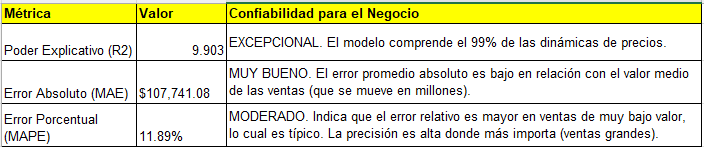


Conclusión sobre Confiabilidad: El modelo es altamente confiable para la planificación financiera y el pronóstico de ingresos generales, ya que su capacidad para explicar la varianza (R²) y su bajo error absoluto (MAE) son excelentes. La desviación porcentual debe gestionarse sabiendo que el modelo subestima o sobreestima con mayor margen los tickets más pequeños.

3. Implicaciones Estratégicas y Recomendaciones

La inteligencia extraída del modelo tiene varias implicaciones estratégicas inmediatas:

 - Enfoque en Productos Clave (Ventas B2C/B2B de Alto Valor): La alta importancia de features como producto_Neo QLED 8K (QN900D), producto_OLED S95D y producto_Galaxy Z Fold5 valida que estos productos son los principales motores de ingresos en términos de Precio Total de la Venta. La estrategia debe continuar priorizando la colocación y el marketing de estos SKUs premium.

 - Influencia de la Categoría (Smartphones y TVs): La presencia de estas categorías como factores importantes sugiere que la estructura del mix de productos dentro de esas familias es clave. La gestión de inventario y la asignación de espacios en tiendas/web debe reflejar su impacto en la venta total.

 - Gestión de la cantidad: Dado que cantidad es la feature más importante, cualquier promoción o incentivo que logre aumentar las unidades vendidas por transacción tendrá el impacto más directo y significativo en el PrecioTotalProducto.


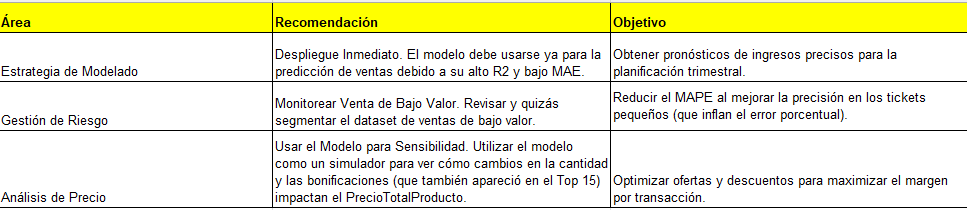

